In [1]:
from datasets import load_dataset


ds = load_dataset("hassaanshafqat/spotify-data")






c:\Users\Hassaan\Desktop\ai-lab-assignment-2\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import numpy as np

ds_array = np.array(ds['train'].to_pandas()[['track_name', 'streams']])
ds_array = ds_array[ds_array[:,1].argsort()[::-1]] # sort by streams


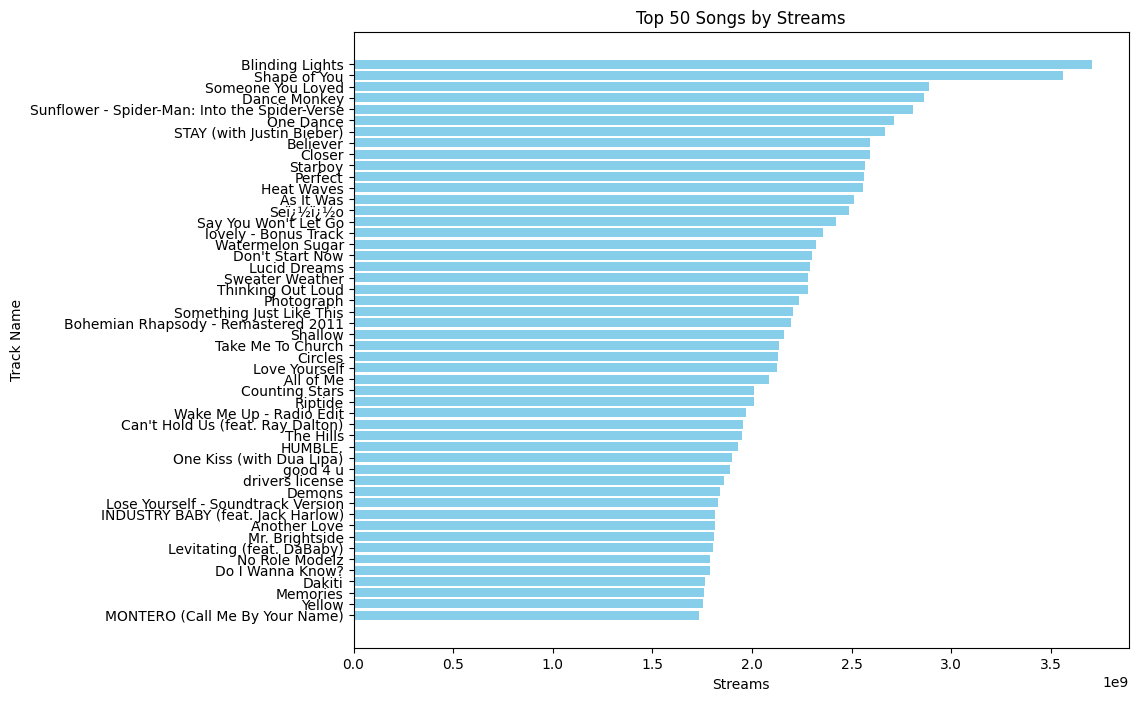

In [3]:
# Convert streams column to string and filter out rows where the streams column is not an integer
ds_array = ds_array[np.char.isdigit(ds_array[:, 1].astype(str))]


# Sort the ds_array by streams in descending order
ds_array = ds_array[ds_array[:, 1].astype(int).argsort()[::-1]]

import matplotlib.pyplot as plt

# Extract the top 50 songs and their streams
top_50_songs = ds_array[:50]

# Convert streams to integers
streams = top_50_songs[:, 1].astype(int)

# Plot the graph
plt.figure(figsize=(10, 8))
plt.barh(top_50_songs[:, 0], streams, color='skyblue')
plt.xlabel('Streams')
plt.ylabel('Track Name')
plt.title('Top 50 Songs by Streams')
plt.gca().invert_yaxis()
plt.show()